In [127]:
import pandas as pd
import numpy as np


In [128]:
df=pd.read_csv("Salary_Data.csv")


In [129]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [130]:
df.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [131]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,75479.666667
std,2.837888,27957.982093
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [132]:
df.shape

(30, 2)

In [133]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [134]:
df.set_index('YearsExperience',inplace=True)

In [135]:
df.reset_index(inplace=True)

In [136]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


Data visulazation

In [138]:
import matplotlib.pyplot as plt

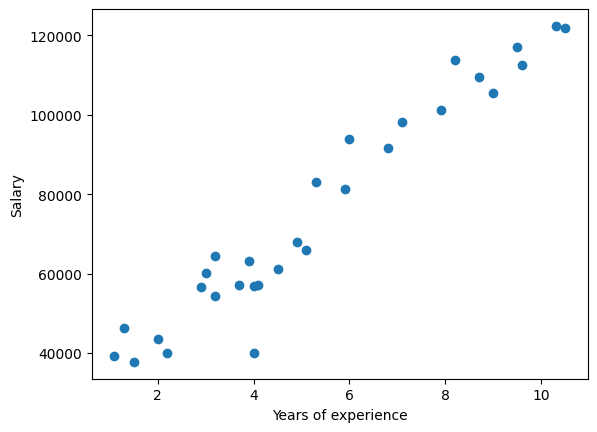

In [139]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

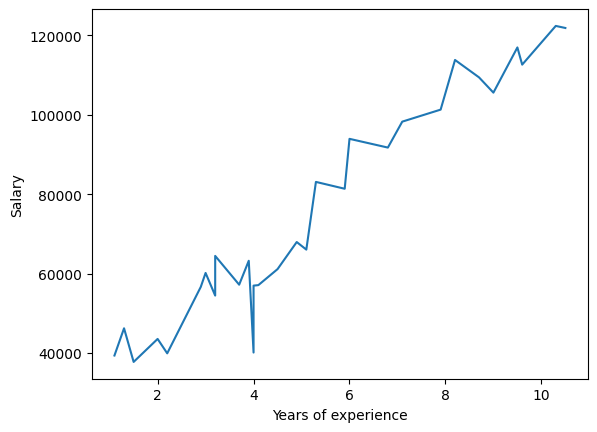

In [140]:
plt.plot(df['YearsExperience'],df["Salary"])
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

Prepare Data

In [141]:
x=df.drop('Salary',axis=1)
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [142]:
y=df['Salary']
y

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     40094
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64

In [143]:
x.shape,y.shape
# X = df.iloc[:, 0:-1]
# y = df.iloc[:, -1]
# use for the same we didi earlier

((30, 1), (30,))

spliting data into traain and test

In [144]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [145]:
from sklearn.model_selection import train_test_split

In [146]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=101,test_size=0.2)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((24, 1), (6, 1), (24,), (6,))

Using linear Regression

In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
classifier=LinearRegression()
classifier.fit(x_train, y_train)

LinearRegression()

Test Model

In [149]:
classifier.score(x_test, y_test)

0.9946514520020594

In [150]:
pred = classifier.predict(x_test)
pred

array([ 89745.33430496, 107871.86454056,  55400.32964803,  81159.08314073,
        39181.85522671, 116458.11570479])

In [151]:
y_test

20     91738
24    109431
7      54445
18     81363
2      37731
27    112635
Name: Salary, dtype: int64

Check Actual data , Predicted data and difference between the Actual and Predicted data

In [152]:
diff = y_test - pred

In [153]:
pd.DataFrame(np.c_[y_test , pred , diff] , columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,91738.0,89745.334305,1992.665695
1,109431.0,107871.864541,1559.135459
2,54445.0,55400.329648,-955.329648
3,81363.0,81159.083141,203.916859
4,37731.0,39181.855227,-1450.855227
5,112635.0,116458.115705,-3823.115705


Visualize Model, that how it is performing on training data

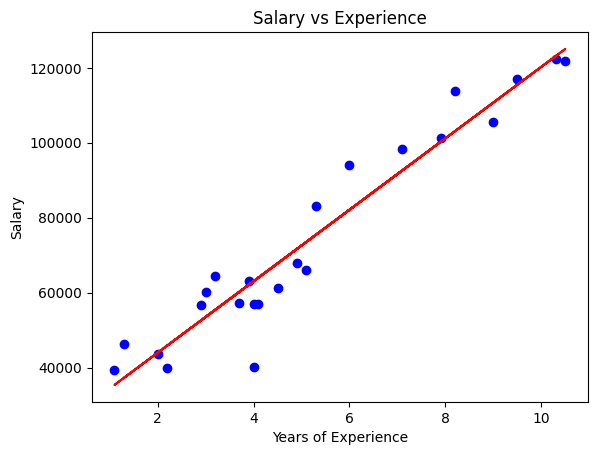

In [154]:
plt.scatter(x_train , y_train , color='blue')
plt.plot(x_train ,classifier.predict(x_train),color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

Visualize Model, that how it is performing on testing data

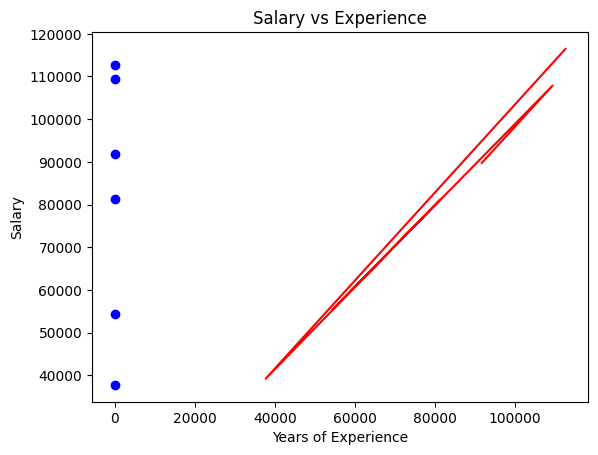

In [155]:
plt.scatter(x_test , y_test,color='blue')
plt.plot(y_test ,classifier.predict(x_test) ,color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

Test on the custom data

In [156]:
exp = int(input("Enter year of experience"))
classifier.predict([[exp]])[0]


Salary of 4 year experience employee = 63032 thousands


c:\Users\yogesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\yogesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [157]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [160]:
pred_salary=int(classifier.predict([[exp]])[0])
print(f"Predicted Salary of {exp} year experience employee = {pred_salary} thousands")
actual_salary = df[df['YearsExperience'] == exp]['Salary'].mean()
print(f"Actual Salary of {exp} year experience employee = {actual_salary} thousands")

Predicted Salary of 4 year experience employee = 63032 thousands
Actual Salary of 4 year experience employee = 48525.5 thousands


c:\Users\yogesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


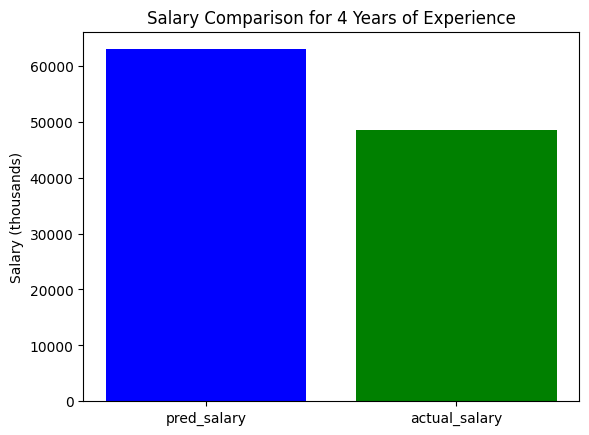

In [164]:
plt.bar(['pred_salary','actual_salary'],[pred_salary,actual_salary], color=['blue', 'green'])
plt.ylabel('Salary (thousands)')
plt.title(f'Salary Comparison for {exp} Years of Experience')
plt.show()


In [167]:
print("Thank YOU!!")

Thank YOU!!
